In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 1. Khai phá dữ liệu

In [152]:
df = pd.read_csv("data/Student_performance_data _.csv")
df.shape

(2392, 15)

In [153]:
# Chuyển về int
df['GradeClass'] = df['GradeClass'].astype('int64')
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
dtype: object

In [154]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [155]:
# Tạo cột mới để phân loại GradeClass
df['GradeClassGroup'] = df['GradeClass'].apply(lambda x: 1 if x == 4.0 else 0)
df = df.drop(columns=["StudentID", "GPA", "GradeClass"])
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClassGroup
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,0.506271
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.500065
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Phân tích

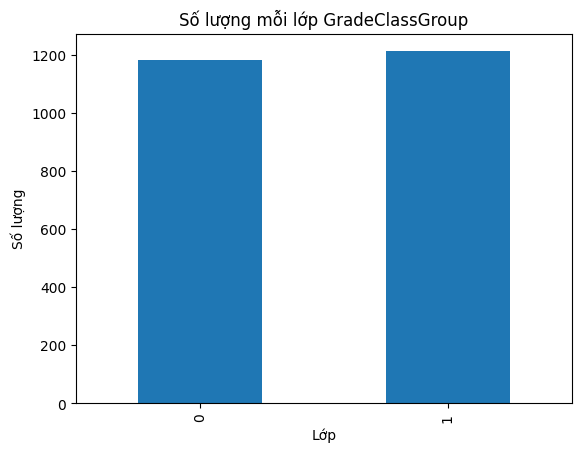

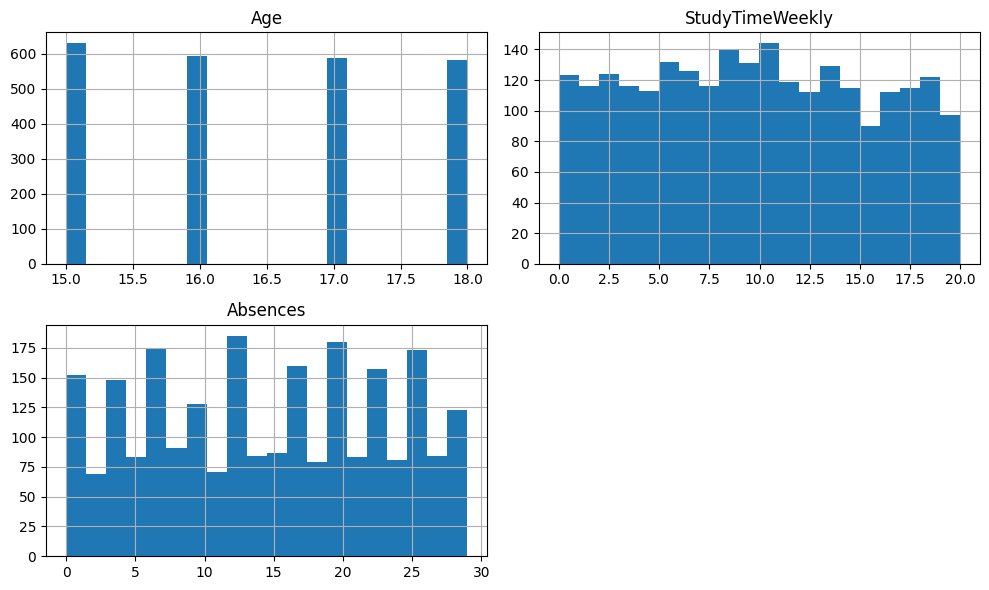

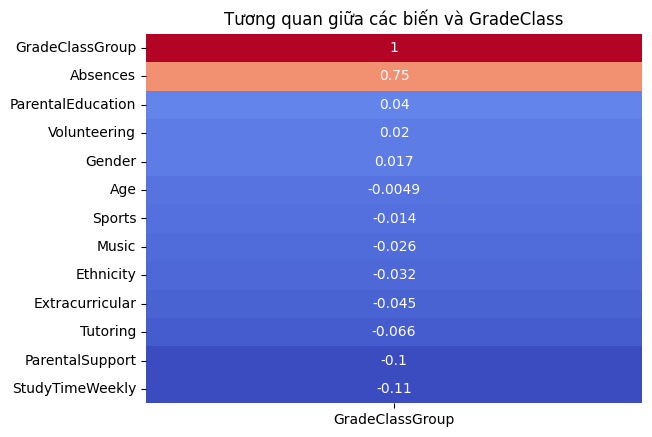

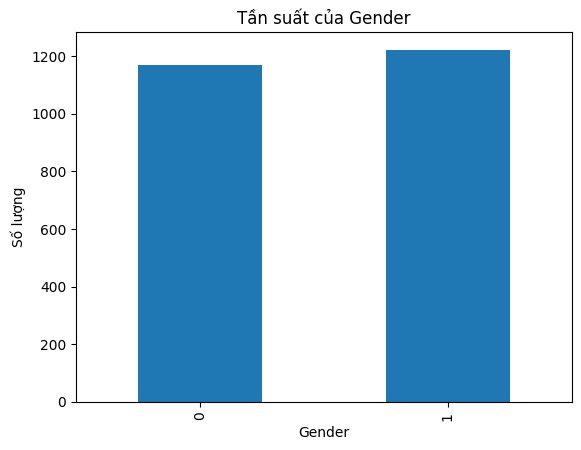

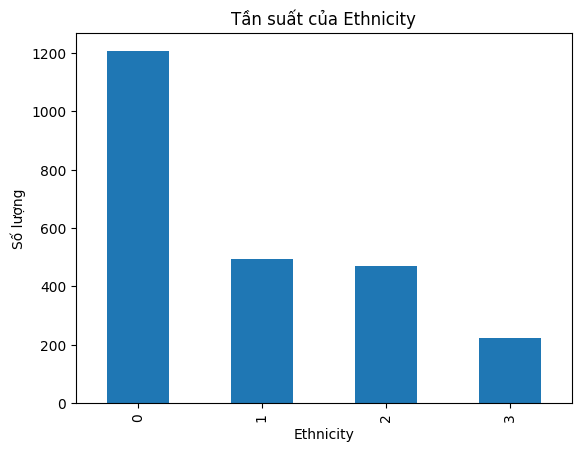

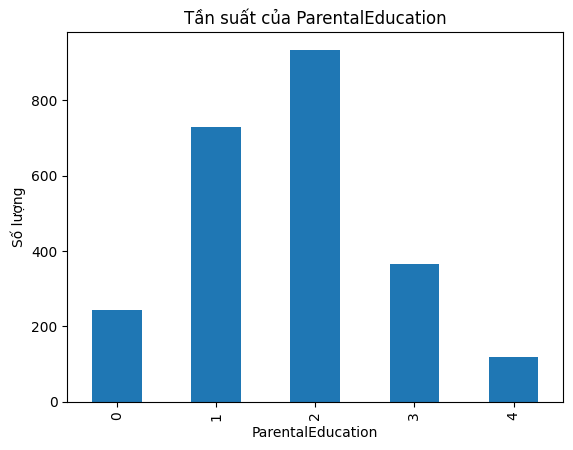

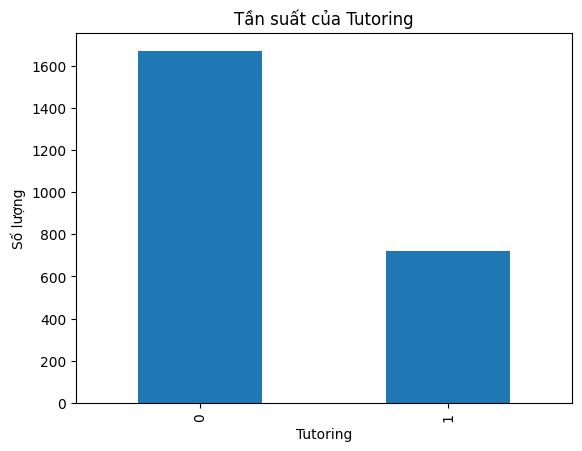

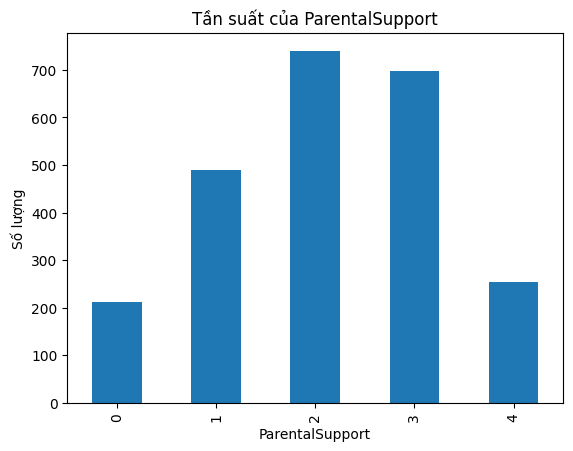

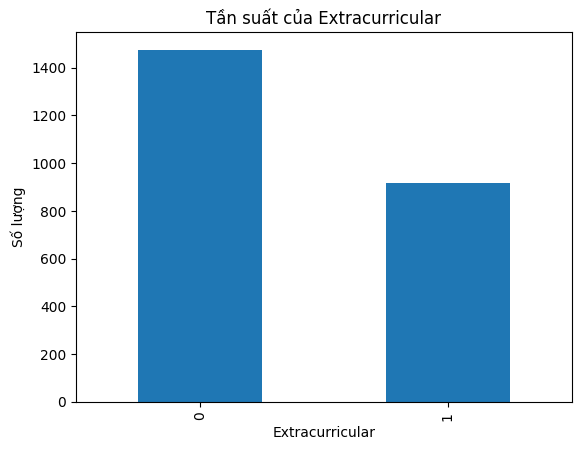

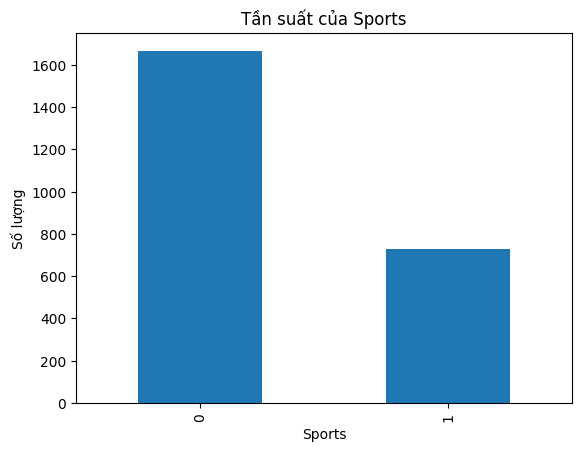

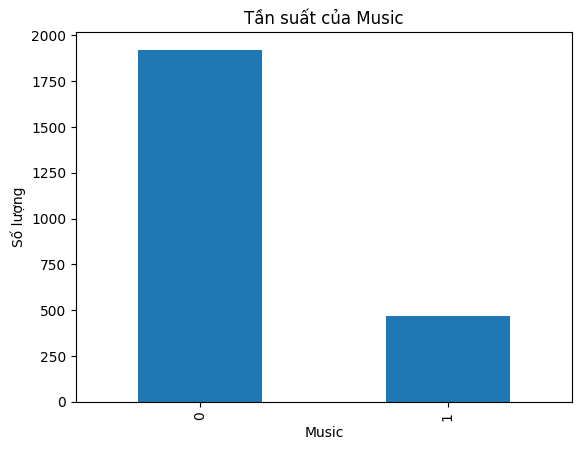

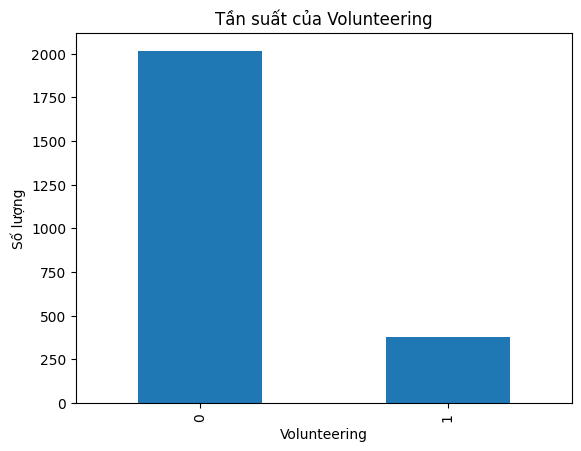

In [156]:
# 1. Phân phối của nhãn (GradeClassGroup)
df['GradeClassGroup'].value_counts().sort_index().plot(kind='bar')
plt.title("Số lượng mỗi lớp GradeClassGroup")
plt.xlabel("Lớp")
plt.ylabel("Số lượng")
plt.show()

# 2. Biểu đồ histogram cho các biến số liên tục
num_cols = ['Age', 'StudyTimeWeekly', 'Absences']
df[num_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# 3. Heatmap tương quan giữa các biến số
corr_with_target = df.corr(numeric_only=True)['GradeClassGroup'].sort_values(ascending=False)
# Vẽ heatmap chỉ với tương quan tới GradeClassGroup
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title("Tương quan giữa các biến và GradeClass")
plt.show()

# 4. Đếm tần suất các cột phân loại (Gender, Ethnicity,...)
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
            'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in cat_cols:
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.show()

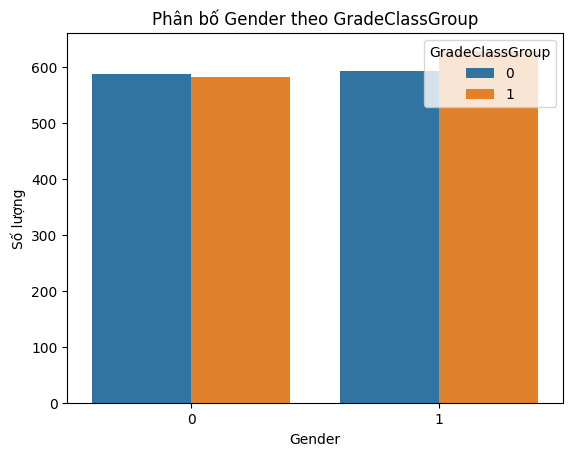

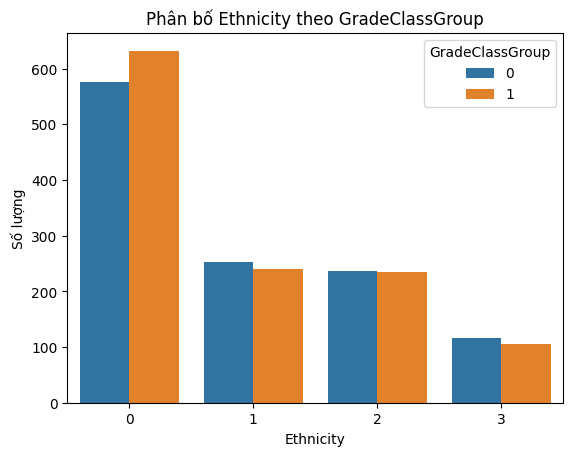

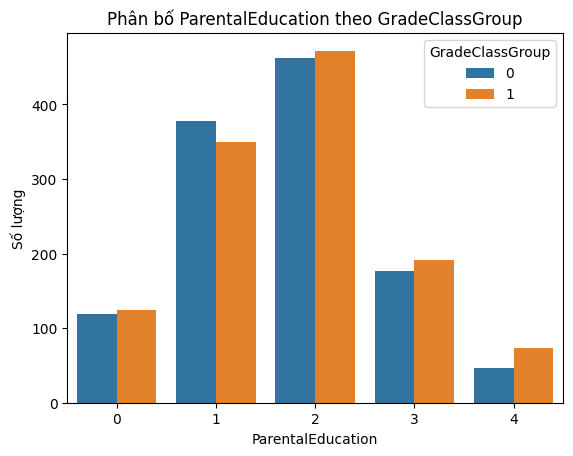

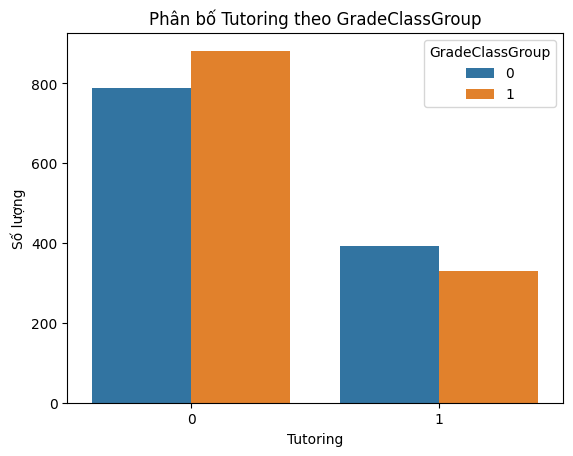

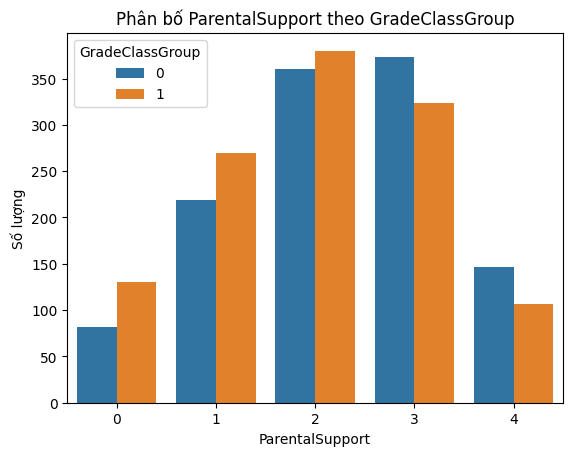

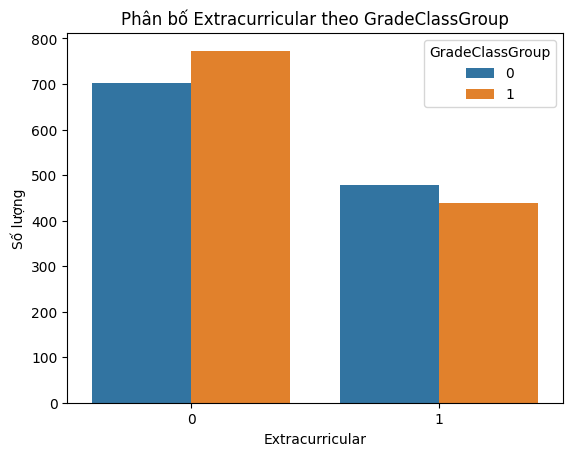

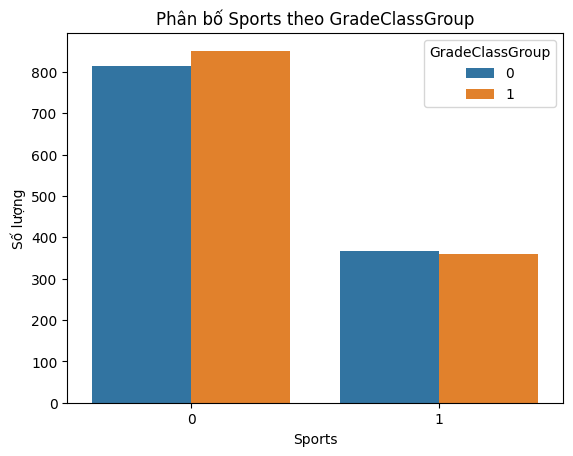

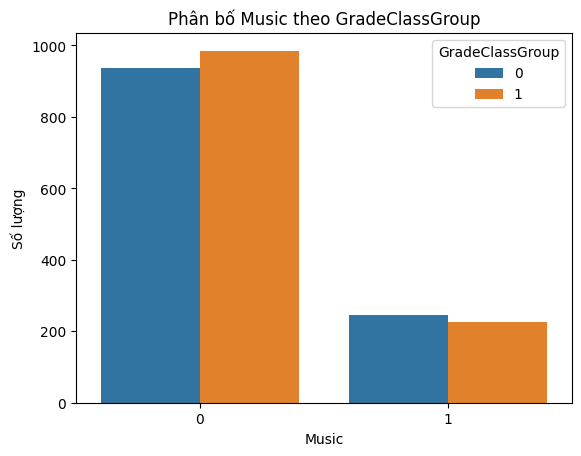

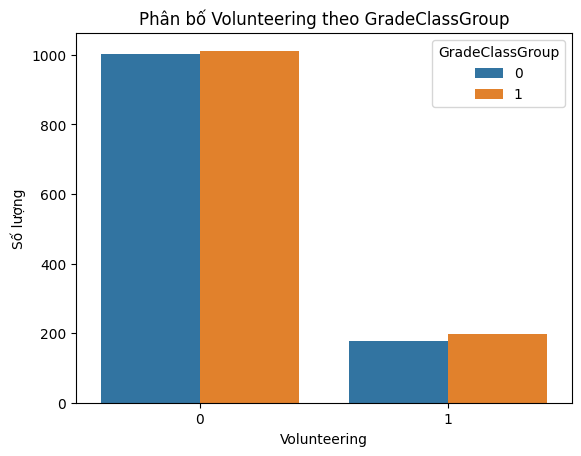

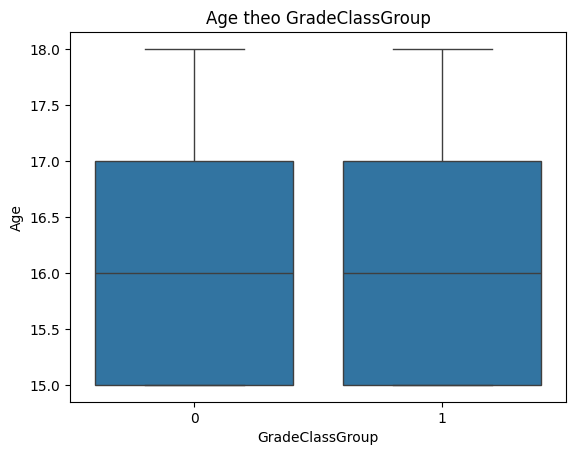

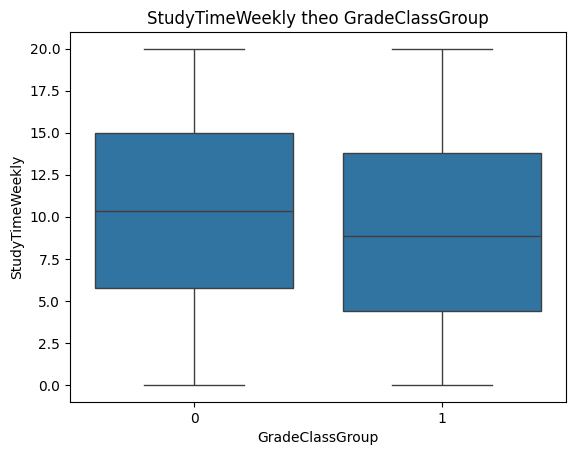

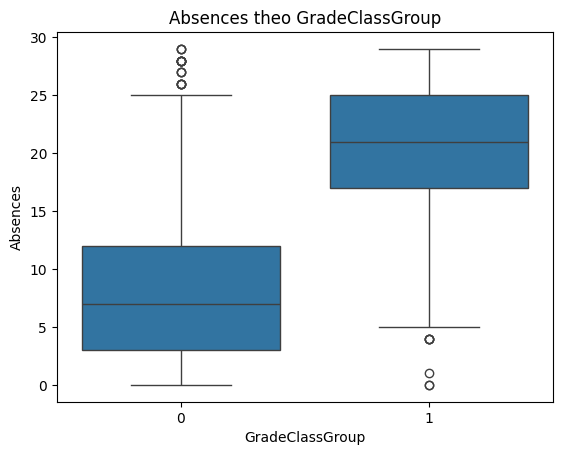

In [157]:
# 1. CÁC CỘT PHÂN LOẠI
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
            'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='GradeClassGroup', data=df)
    plt.title(f"Phân bố {col} theo GradeClassGroup")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.legend(title="GradeClassGroup")
    plt.show()

# 2. CÁC CỘT SỐ LIÊN TỤC
num_cols = ['Age', 'StudyTimeWeekly', 'Absences']

for col in num_cols:
    plt.figure()
    sns.boxplot(x='GradeClassGroup', y=col, data=df)
    plt.title(f"{col} theo GradeClassGroup")
    plt.xlabel("GradeClassGroup")
    plt.ylabel(col)
    plt.show()


# 3. Huấn luyện

In [158]:
X = df.drop(columns=["GradeClassGroup"])
y = df["GradeClassGroup"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
df

Accuracy: 0.8288100208768268
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       228
           1       0.85      0.81      0.83       251

    accuracy                           0.83       479
   macro avg       0.83      0.83      0.83       479
weighted avg       0.83      0.83      0.83       479



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClassGroup
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,1
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,0


In [159]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8872651356993737
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       228
           1       0.89      0.90      0.89       251

    accuracy                           0.89       479
   macro avg       0.89      0.89      0.89       479
weighted avg       0.89      0.89      0.89       479



In [160]:
# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9164926931106472
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       228
           1       0.92      0.92      0.92       251

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



In [162]:
# Naive Bayes
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred_nvb = nvb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nvb))
print(classification_report(y_test, y_pred_nvb))

Naive Bayes Accuracy: 0.8977035490605428
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       228
           1       0.91      0.90      0.90       251

    accuracy                           0.90       479
   macro avg       0.90      0.90      0.90       479
weighted avg       0.90      0.90      0.90       479



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

n_repeat = 10
cv = 5
results = {name: [] for name in models}

for i in range(n_repeat):
    # Mỗi lần dùng dữ liệu scale khác nhau để đảm bảo ngẫu nhiên
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=i+35)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    for name, model in models.items():
        if name in ["Logistic Regression", "KNN", "SVM", "Naive Bayes"]:
            scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
        else:
            scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        results[name].extend(scores)

# In kết quả trung bình và độ lệch chuẩn
print(f"🔁 Đánh giá mô hình qua {n_repeat} lần lặp (CV={cv}):")
for name in results:
    acc_mean = np.mean(results[name])
    acc_std = np.std(results[name])
    print(f"🔹 {name}: Mean Accuracy = {acc_mean:.4f}, Std = {acc_std:.4f}")


🔁 Đánh giá mô hình qua 10 lần lặp (CV=5):
🔹 Decision Tree: Mean Accuracy = 0.8707, Std = 0.0138
🔹 KNN: Mean Accuracy = 0.8072, Std = 0.0177
🔹 SVM: Mean Accuracy = 0.9027, Std = 0.0124
🔹 Naive Bayes: Mean Accuracy = 0.8826, Std = 0.0146
